In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [15]:
URL = "https://webscraper.io/test-sites/e-commerce/static"
HEADERS = {"User-Agent": "Mozilla/5.0"} #Header tells the website that we are a normal user, not a robot-some websites block robots

response = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(response.text, "html.parser") # Convert the website content into a readable HTML format

products = soup.find_all("div", class_="thumbnail")

In [16]:
data = [] #Create an Empty list to store products data

for product in products: #let's loop through each product present on the webpage
    # Product Name
    name = product.find("a", class_="title")
    product_name = name.text.strip() if name else None #This is a short form of an if-else condition.
    #if we do not write this if-else condition - and Name nhi mila Website me then it will crash
    #If name is missing, Python will crash with an error like:
    #AttributeError: 'NoneType' object has no attribute 'text'

    # Extract brand name (first word of product name)
    brand = product_name.split()[0] if product_name else None

    # Price
    price = product.find("h4", class_="price")
    discounted_price = float(price.text.replace("$", "")) if price else None

    # Rating (count stars)
    rating = len(product.find_all("span", class_="glyphicon-star"))

    # Number of Reviews
    reviews = product.find("p", class_="pull-right")
    num_reviews = int(reviews.text.split()[0]) if reviews else 0 #[0] it indicates the index of the sentence.

    data.append({
        "Product Name": product_name,
        "Brand": brand,
        "Original Price": None,
        "Discounted Price": discounted_price,
        "Discount Percentage": None,
        "Rating": rating,
        "Number of Reviews": num_reviews
    })

In [25]:
brand

'Acer'

In [ ]:
df = pd.DataFrame(data)
df.to_csv("products.csv", index=False)

print("Scraping completed. Data saved to products.csv")

In [17]:
import pandas as pd

df = pd.read_csv("products.csv")

print("\nTop Brands:")
print(df["Brand"].value_counts())


Top Brands:
Brand
Iphone    1
MSI       1
Acer      1
Name: count, dtype: int64


In [18]:
print("\nPrice Statistics:")
print(df["Discounted Price"].describe())


Price Statistics:
count       3.000000
mean      811.760000
std       340.050784
min       436.290000
25%       668.140000
50%       899.990000
75%       999.495000
max      1099.000000
Name: Discounted Price, dtype: float64


In [19]:
print("\nAverage Rating:", df["Rating"].mean())


Average Rating: 0.0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

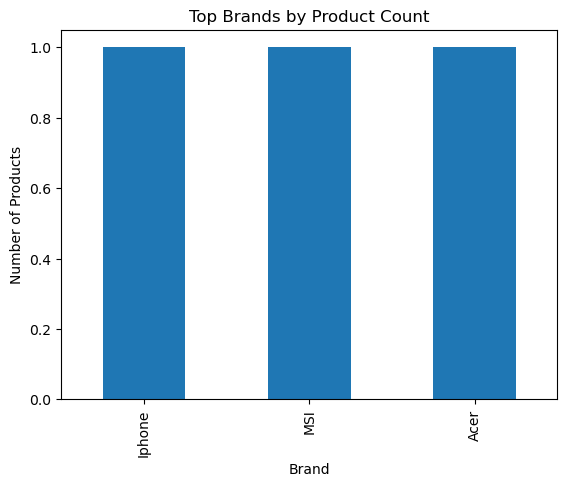

In [21]:
df = pd.read_csv("products.csv")

# Top Brands
df["Brand"].value_counts().plot(kind="bar")
plt.title("Top Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.show()

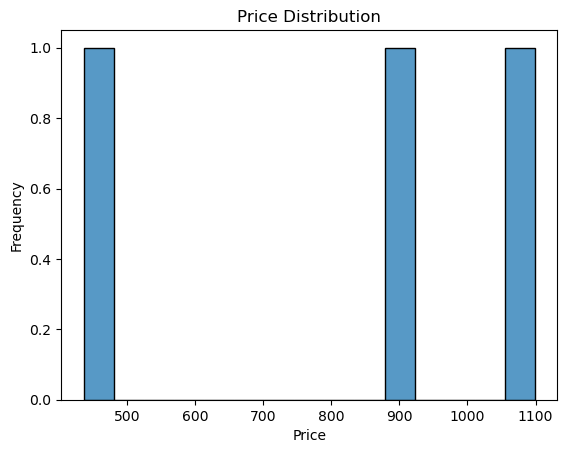

In [22]:
# Price Distribution
sns.histplot(df["Discounted Price"], bins=15)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

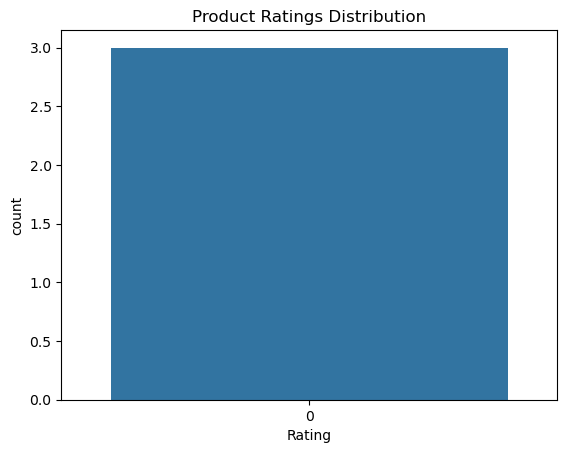

In [23]:
# Ratings
sns.countplot(x="Rating", data=df)
plt.title("Product Ratings Distribution")
plt.show()